# Conditioning of evaluating tan()

In [5]:
import numpy as np
import matplotlib.pyplot as pt
import scipy as sp

Let us estimate the sensitivity of evaluating the $\tan$ function:

The slowest run took 4.41 times longer than the fastest. This could mean that an intermediate result is being cached.
9.73 ms ± 4.5 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


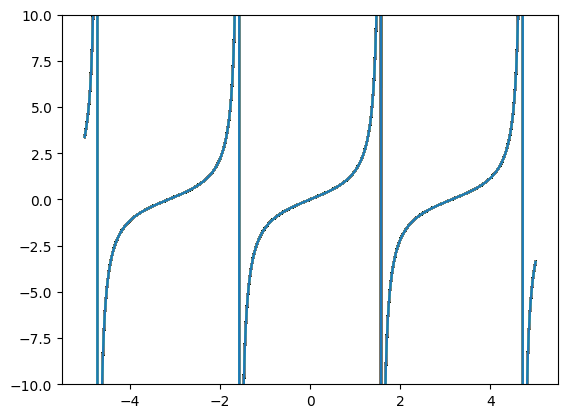

In [4]:
%%timeit
x = np.linspace(-5, 5, 1000)
pt.ylim([-10, 10])
pt.plot(x, np.tan(x))

In [6]:
x = np.pi/2 - 0.0001
#x = 0.1
x

1.5706963267948966

In [7]:
np.tan(x)

np.float64(9999.999966661644)

In [8]:

dx = 0.00005
np.tan(x+dx)

np.float64(19999.99998335545)

## Condition number estimates

### From evaluation data


In [11]:
#clear

np.abs(np.tan(x+dx) - np.tan(x))/np.abs(np.tan(x)) / (np.abs(dx) / np.abs(x))

np.float64(31413.926693068603)

### Using the derivative estimate

In [12]:
import sympy as sp

xsym = sp.Symbol("x")

f = sp.tan(xsym)
df = f.diff(xsym)
df

tan(x)**2 + 1

Evaluate the derivative estimate. Use `.subs(xsym, x)` to substitute in the value of `x`.

In [13]:
#clear
(xsym*df/f).subs(xsym, x)

15706.9633726542